In [132]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.datasets import load_wine
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import r2_score
from sklearn.metrics import confusion_matrix
from sklearn.model_selection import cross_val_score
from sklearn.svm import SVC
sns.set()

In [133]:
df = load_wine()
wine = pd.DataFrame(data=df.data, columns=df.feature_names)
target = df.target
wine.head()

,alcohol,malic_acid,ash,alcalinity_of_ash,magnesium,total_phenols,flavanoids,nonflavanoid_phenols,proanthocyanins,color_intensity,hue,od280/od315_of_diluted_wines,proline
0,14.23,1.71,2.43,15.6,127.0,2.80,3.06,0.28,2.29,5.64,1.04,3.92,1065.0
1,13.20,1.78,2.14,11.2,100.0,2.65,2.76,0.26,1.28,4.38,1.05,3.40,1050.0
2,13.16,2.36,2.67,18.6,101.0,2.80,3.24,0.30,2.81,5.68,1.03,3.17,1185.0
3,14.37,1.95,2.50,16.8,113.0,3.85,3.49,0.24,2.18,7.80,0.86,3.45,1480.0
4,13.24,2.59,2.87,21.0,118.0,2.80,2.69,0.39,1.82,4.32,1.04,2.93,735.0


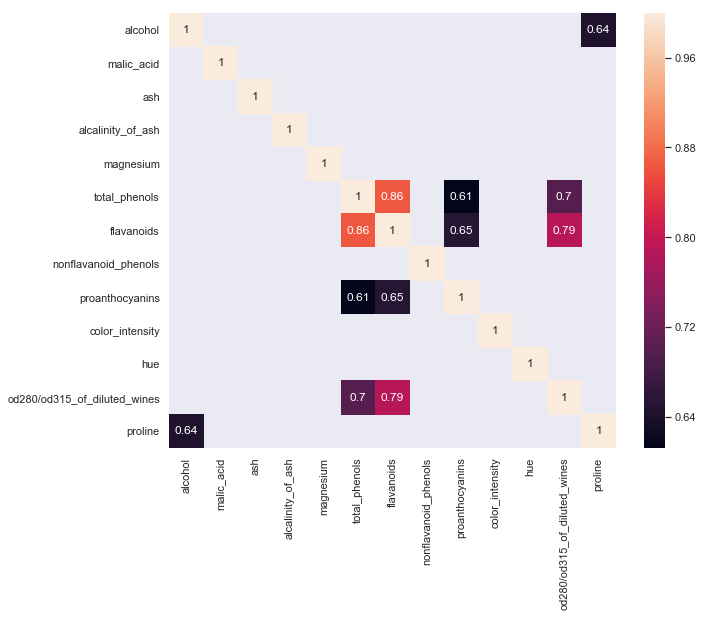

In [134]:
x = wine.corr()>0.6
plt.figure(figsize=(10,8))
sns.heatmap(wine.corr()[x], annot=True)

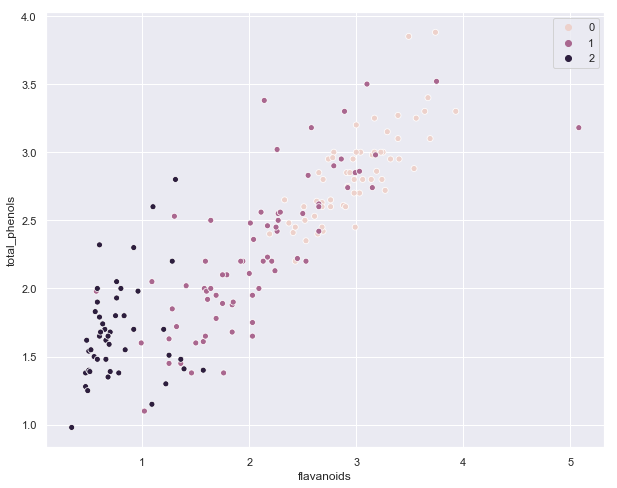

In [135]:
plt.figure(figsize=(10,8))
sns.scatterplot(x='flavanoids', y='total_phenols', hue=target, data=wine)

In [136]:
scale = StandardScaler()
col = ['flavanoids', 'total_phenols']
X = scale.fit_transform(wine[col].values)
X_train, X_test, y_train, y_test = train_test_split(X, target, test_size=0.2, random_state=0)
clf = SVC(gamma='auto')
clf.fit(X_train, y_train)


SVC(C=1.0, cache_size=200, class_weight=None, coef0=0.0,
    decision_function_shape='ovr', degree=3, gamma='auto', kernel='rbf',
    max_iter=-1, probability=False, random_state=None, shrinking=True,
    tol=0.001, verbose=False)

In [137]:
confusion_matrix(y_test, clf.predict(X_test))

array([[13,  1,  0],
       [ 6,  9,  1],
       [ 0,  1,  5]], dtype=int64)

In [138]:
cross_val_score(clf, X_train, clf.predict(X_train), cv=5)

array([0.96551724, 0.93103448, 1.        , 0.92857143, 1.        ])

In [139]:
Xv = X.reshape(-1,1)
h=0.02
xmin, xmax= Xv.min(), Xv.max()+1
ymin, ymax = target.min(), target.max()+1
xx, yy = np.meshgrid(np.arange(xmin,xmax,h), np.arange(ymin, ymax,h))

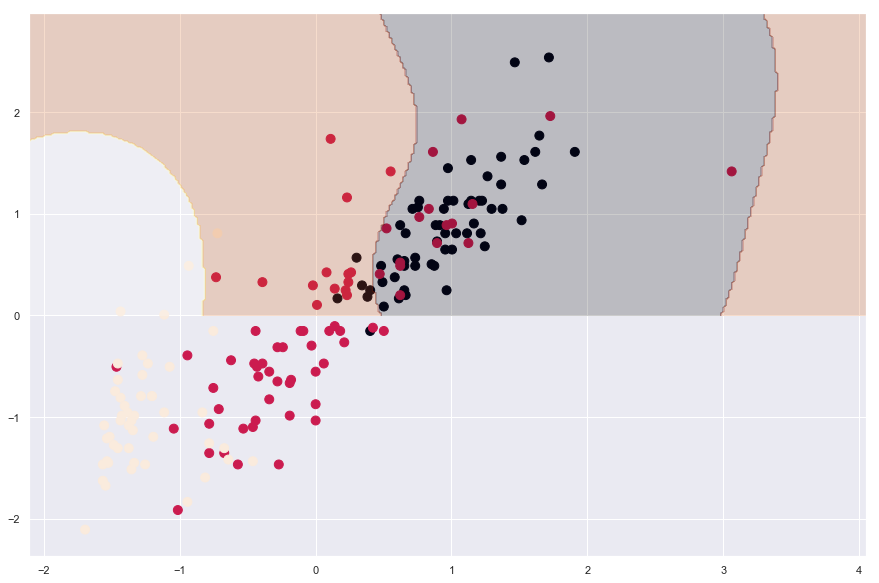

In [140]:
z = clf.predict(np.c_[xx.ravel(), yy.ravel()])
z = z.reshape(xx.shape)
plt.figure(figsize=(15,10))
plt.scatter(X[:,0], X[:,1], c=target, s=80)
ax = plt.contourf(xx, yy, z, alpha=0.2, cmap = 'afmhot', extend = 'both')
plt.show()

In [142]:
X = scale.fit_transform(wine.values)
X_train, X_test, y_train, y_test = train_test_split(X, target, test_size=0.2, random_state=0)
clf = SVC(gamma='auto')
clf.fit(X_train, y_train)
confusion_matrix(y_test, clf.predict(X_test))

array([[14,  0,  0],
       [ 0, 16,  0],
       [ 0,  0,  6]], dtype=int64)

In [143]:
cross_val_score(clf, X_train, clf.predict(X_train), cv=5).mean()

0.9787994891443168